# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, I gathered **all** three pieces of data for this project and loaded them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [480]:
import pandas as pd
import requests as r
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [481]:
# Direct download of the file and loading into a pandas dataframe
df_direct = pd.read_csv('twitter-archive-enhanced.csv')
df_direct.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [482]:
# Programmatically download file from the internet.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)
response

<Response [200]>

In [483]:
# Make directory if it doesn't already exist
folder_name = 'Downloads'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Opening and writing the content of our request to the file    
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [484]:
path = os.getcwd()
os.chdir(path)

In [485]:
# Reading downloaded file to a dataframe
df_download = pd.read_csv(path+'\Downloads\image-predictions.tsv', delimiter = '\t', engine = 'python')
df_download.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [486]:
# Reading from the tweet-json.txt file
with open('tweet-json.txt')as file:
    lines = file.readlines()

data = []
for line in lines:
    data.append(json.loads(line))
    
df_json= pd.DataFrame(data)
df_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,89

In [ ]:
# NO access to twitter api due to ongoing application process
#, however, the code to carry out the function has been highlighted below

"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_direct.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

"""

> The code cells above were used to gather the data for this analysis from different sources
>  1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
>  2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
>  3. The **tweet_json.txt** file. Twitter API application still in progress.

## Assessing Data
In this section, I detected and documented at least **eight (8) quality issues and two (2) tidiness issue** using both **visual assessment** and **programmatic assessement** to assess the data.

**Note:** Key points to note

* Only original ratings (no retweets) that have images are required. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, I only cleaned enough to draw reasonable insights from the dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* Tweets beyond August 1st, 2017 werr not gathered due to the absence of image predicitions. 



>There are 3 data sources. These are
>  1. df_direct
>  2. df_download
>  3. df_json

In [487]:
df_direct.shape

(2356, 17)

In [488]:
df_direct.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [489]:
df_direct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [490]:
df_direct.groupby('rating_numerator').name.value_counts()

rating_numerator  name          
0                 None                2
1                 None                8
                  an                  1
2                 None                4
                  Crystal             1
                  Henry               1
                  Tedrick             1
                  an                  1
                  quite               1
3                 None                8
                  Alexanderson        1
                  Bernie              1
                  Charl               1
                  Chuck               1
                  Elliot              1
                  Hammond             1
                  Patrick             1
                  Phil                1
                  Tommy               1
                  Wesley              1
                  a                   1
4                 None                9
                  a                   3
                  Alice               1
       

In [491]:
df_download.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [492]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
dogs = df_download[df_download.p1_dog == True]
dogs.p1.value_counts().sort_index(ascending = True)

Afghan_hound                        4
Airedale                           12
American_Staffordshire_terrier     13
Appenzeller                         2
Australian_terrier                  2
Bedlington_terrier                  5
Bernese_mountain_dog               10
Blenheim_spaniel                   11
Border_collie                      12
Border_terrier                      7
Boston_bull                         9
Brabancon_griffon                   3
Brittany_spaniel                    7
Cardigan                           19
Chesapeake_Bay_retriever           23
Chihuahua                          83
Dandie_Dinmont                      6
Doberman                            8
English_setter                      8
English_springer                   10
EntleBucher                         1
Eskimo_dog                         18
French_bulldog                     26
German_shepherd                    20
German_short-haired_pointer         7
Gordon_setter                       4
Great_Dane  

In [493]:
df_download.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [494]:
df_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,89

In [495]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Quality issues
`Direct Downloads table`
1. Timestamp is a string and not date-time format

2. Presence of retweets in the `direct downloads` data set

3. Missing Data - Expanded urls

4. Missing and Inaccurate Data in the name column

5. Inaccurate/Inconsistent Data
     
     a.  Numerator rating for logan is 9.75 and not 75, tweet_id = 786709082849828864
     
     b.  Numerator rating for Sophie is 11.27 and not 27, tweet_id = 778027034220126208
   

6. Missing Data - Doggo, floofer, pupper, poppo


`Json Table`

7. Presence of retweets in the `json downloads` data set

8. Missing data - extended entities, tweet reply meta data, geo, cordinators, etc.

### Tidiness issues

`Direct Downloads table`
1. The various stages of development for each dog should all be in one column

2. Some expanded columns have more than one item in them.



## Cleaning Data
In this section, clean **all** of the issues documented while assessing are cleaned. 



In [496]:
# Make copies of original pieces of data
direct_clean = df_direct.copy()
download_clean = df_download.copy()
json_clean = df_json.copy()

In [497]:
direct_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Issue #1: Presence of retweets in the `Direct_downloads` dataset. 
This creates duplicates and impacts on the quality of the data.

#### Define

Remove all retweets data in the dataset.

#### Code

In [498]:
# Remove rows with retweeted_status_id and in_repy_to_status_id
direct_clean = direct_clean[direct_clean['retweeted_status_id'].isnull()]
direct_clean = direct_clean[direct_clean['in_reply_to_status_id'].isnull()]
direct_clean.shape

(2097, 17)

#### Test

In [499]:
direct_clean['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Further Cleaning

In [501]:
direct_clean.drop(['retweeted_status_id','in_reply_to_status_id', 
                   'in_reply_to_user_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

> The code above removed all retweeted data from the dataframe. This was done to avoid duplications captured in retweets. 

> Other columns irrelevant to the analysis to be carried out were also dropped.

> It is important to note the likielihood of duplicates occuring due to multiple tweets from the account on the same dog with different tweet_ids and ratings over the period of years covered in the archive.

#### Issue #2: The datetime format of timestamp in the `Direct_downloads` dataset is not ideal

In order to investigate the period in which the tweets were made, the datatype of the dataset should be in the _**date_time**_ format

#### Define

Use regex to extract date only from the timestamp into a new column. Convert the datatype of the new column to _**date_time**_ format

#### Code

In [502]:
direct_clean['date'] = direct_clean.timestamp.str.extract('(\d{4}-\d{2}-\d{2})', expand = True)

In [503]:
direct_clean.date.isnull().sum()

0

In [504]:
direct_clean.drop('timestamp',axis = 1, inplace = True)

In [505]:
direct_clean.date = pd.to_datetime(direct_clean.date)

#### Test

In [506]:
direct_clean.date.dtype

dtype('<M8[ns]')

> The code above was used to create a __date__ column from the _**time_stamp**_ column. This was then converted to **datetime** format.

>This was necessary in order to enable filtering on the date column to ensure that tweets beyond 1st August 2017 were not captured in the dataset for analysis

#### Issue #3: Missing and inaccurate data in the `names` column of the `direct_downloads` dataset

#### Define: 

Clean up data by dropping the `names` column in the `direct_downloads` dataset.

#### Code

In [507]:
direct_clean.drop('name', axis = 1, inplace = True)

#### Test

In [508]:
direct_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'date'],
      dtype='object')

> The code above was used to drop the name column due to missing and inaccurate name data. The name data would not be used in this analysis.

#### Issue #4: Missing Data in the `Direct_downloads` dataset

The _**expanded_urls**_ column has missing data


#### Define: 

Remove rows with missing data in the _**expanded_urls**_ column by dropping na fields

#### Code

In [509]:
direct_clean.dropna(inplace = True)

#### Test

In [510]:
# Should return 0 if successfull
direct_clean.expanded_urls.isnull().sum()

0

> The code above was used to drop empty rows in the _**expanded_urls**_ column. 

#### Issue #5: Presence of retweets in the `json_downloads` dataset. 
This creates duplicates and impacts on the quality of the data.

#### Define:
Remove all retweets data in the dataset

#### Code

In [511]:
# Remove rows with retweeted_status_id and in_repy_to_status_id
json_clean = json_clean[json_clean['retweeted_status'].isnull()]
json_clean = json_clean[json_clean['in_reply_to_status_id'].isnull()]
json_clean.shape

(2097, 31)

#### Test

In [512]:
json_clean['retweeted_status'].value_counts()

Series([], Name: retweeted_status, dtype: int64)

> The code above removed all retweeted data from the dataframe. This was done to avoid duplications captured in retweets. 


#### Issue #6: Missing data in the `json` dataset

#### Define: 

Clean up data by dropping columns in the `json` dataset that won't be useful for our analysis

#### Code

In [514]:
json_clean.drop(['truncated','display_text_range','entities',
                'extended_entities','source','in_reply_to_status_id',
                'in_reply_to_status_id_str','in_reply_to_user_id',
                'in_reply_to_user_id_str','in_reply_to_screen_name',
                'user', 'geo','coordinates','place',
                'contributors','is_quote_status','retweeted'
                ,'possibly_sensitive','possibly_sensitive_appealable',
                'lang','retweeted_status','quoted_status_id','quoted_status_id_str',
                'quoted_status'], axis = 1, inplace = True)

#### Test

In [515]:
json_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'retweet_count',
       'favorite_count', 'favorited'],
      dtype='object')

> The code above was used to remove irrelevant columns to the analysis.



#### Issue #7: Missing data in the `doggo_floofer_pupper_puppo` fields in the `direct_downloads` dataset

#### Define: 

Clean up data by dropping the `doggo`, `floofer`, `pupper`, and `puppo` columns in the `direct_downloads` dataset.

#### Code

In [516]:
direct_clean.doggo.value_counts(), direct_clean.floofer.value_counts(), direct_clean.pupper.value_counts(), direct_clean.puppo.value_counts()

(None     2011
 doggo      83
 Name: doggo, dtype: int64,
 None       2084
 floofer      10
 Name: floofer, dtype: int64,
 None      1865
 pupper     229
 Name: pupper, dtype: int64,
 None     2070
 puppo      24
 Name: puppo, dtype: int64)

In [517]:
direct_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

#### Test

In [518]:
direct_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'date'],
      dtype='object')

> The code above was used to remove the `doggo`, `floofer`, `pupper`, and `puppo` columns. This decision was made due to the magnitude of missing data. The proportion of missing data with respect to the whole dataset was too large to be ignored. Therfore, the data would not be useful in the analysis

#### Issue #8: Tidiness; The stages of development of the dogs in the `direct_downloads` dataset should all be in one column

#### Define:

Due to insufficient data, these columns would be dropped. If the data were sufficient, the melt function could have been used to itemise each of them in one column. They will not be utilised in the analysis.

#### Code

> Treated in Item 7 above

#### Test

> Treated in Item 7 above

#### Issue #9: Tidiness; Many columns in the `json_download` dataset contain lists and dictionaires violating the tidiness rule

#### Define:

Due to insufficient data, these columns would be dropped. They will not be utilised in the analysis.
#### Code

> See Item 5 above

#### Test

> See Item 5 above

#### Issue #10: Data type of `tweet_id` in the `direct_downloads` dataset  and `tweet_id` in the  `download_clean` dataset is not ideal.

#### Define:

Convert the datatype of tweet_id in the _**direct_downloads**_ and _**download_clean**_ dataset
#### Code

In [519]:
direct_clean.tweet_id = direct_clean.tweet_id.astype('string')
download_clean.tweet_id = download_clean.tweet_id.astype('string')

#### Test

In [520]:
direct_clean.tweet_id.dtype

string[python]

In [521]:
direct_clean.tweet_id.dtype

string[python]

> The code above was used to convert the _**tweet_id**_ datatype in the `direct_downloads` and `downloads_clean` dataset from int to string. ids are usually better as strings to avoid truncation and manipulation in other data types.

#### Issue #11: Inaccurate and Inconsistent ratings in the `direct_downloads` dataset

#### Define:

Clean the inaccurate ratings by dropping rows with the tweet_id of visually observed errors ( 786709082849828864 and 778027034220126208)

Clean inconsisten rating scales by dropping rows with rating_denominator greater than 10

#### Code

In [522]:
direct_clean.query('tweet_id == "786709082849828864"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date
695,786709082849828864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,2016-10-13


In [523]:
direct_clean.query('tweet_id == "778027034220126208"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date
763,778027034220126208,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,2016-09-20


In [524]:
direct_clean.drop(axis = 0, index = 695, inplace= True)
direct_clean.drop(axis = 0, index = 763, inplace= True)

In [525]:
direct_clean = direct_clean.query('rating_denominator == 10')

In [527]:
direct_clean.shape

(2075, 7)

#### Test

In [528]:
direct_clean.query('tweet_id == "786709082849828864"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date


In [529]:
direct_clean.query('tweet_id == "778027034220126208"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date


In [530]:
# Shape should equal (2075,7)
direct_clean.shape

(2075, 7)

> The code above was used to remove data quality issues that were spotted by visual inspection. 

> The code above was also used to extract datasets with _**rating_denominator**_ that was not equal to 10. This was done for the following reasons
>  1. For uniformity of the results
>  2. Visual inspection revealed that some rows in this category were inaccurate
>  3. The number of affected rows amounted to 17 which can be considered as inconsequential to the whole dataset

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [531]:
json_clean.rename(columns = {'id_str': 'tweet_id'}, inplace = True)

In [532]:
json_clean.columns

Index(['created_at', 'id', 'tweet_id', 'full_text', 'retweet_count',
       'favorite_count', 'favorited'],
      dtype='object')

In [533]:
merge1 = direct_clean.merge(json_clean, how = 'left', on = 'tweet_id')
merge1.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,created_at,id,full_text,retweet_count,favorite_count,favorited
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,2017-08-01,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,2017-08-01,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819,False


In [534]:
master_data = merge1.merge(download_clean, how = 'left', on = 'tweet_id')
master_data.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,created_at,id,full_text,retweet_count,favorite_count,favorited,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,2017-08-01,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,2017-08-01,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [535]:
master_data[master_data['p1'].isnull()]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,created_at,id,full_text,retweet_count,favorite_count,favorited,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,885518971528720385,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,2017-07-13,Thu Jul 13 15:19:09 +0000 2017,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,3899,20788,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,884247878851493888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,https://twitter.com/kaijohnson_19/status/883965650754039809,13,10,2017-07-10,Mon Jul 10 03:08:17 +0000 2017,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,21298,74423,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,878604707211726852,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,https://twitter.com/bbcworld/status/878599868507402241,13,10,2017-06-24,Sat Jun 24 13:24:20 +0000 2017,878604707211726852,Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,7582,30931,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,876537666061221889,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,https://twitter.com/mpstowerham/status/876162994446753793,14,10,2017-06-18,Sun Jun 18 20:30:39 +0000 2017,876537666061221889,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,4800,23869,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,875097192612077568,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,https://twitter.com/drboondoc/status/874413398133547008,13,10,2017-06-14,Wed Jun 14 21:06:43 +0000 2017,875097192612077568,You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,6342,27997,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,871102520638267392,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14,10,2017-06-03,Sat Jun 03 20:33:19 +0000 2017,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,5764,21461,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,866720684873056260,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",He was providing for his family 13/10 how dare you https://t.co/Q8mVwWN3f4,https://twitter.com/nbcnews/status/866458718883467265,13,10,2017-05-22,Mon May 22 18:21:28 +0000 2017,866720684873056260,He was providing for his family 13/10 how dare you https://t.co/Q8mVwWN3f4,5168,20888,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,855857698524602368,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS AMAZING HI HUMAN I LOVE YOU AS WELL"" 13/10 https://t.co/sb73bV5Y7S",https://twitter.com/perfy/status/855857318168150016,13,10,2017-04-22,Sat Apr 22 18:55:51 +0000 2017,855857698524602368,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS 

In [536]:
master_data.dropna(inplace=True)

In [537]:
master_data.to_csv("twitter_archive_master.csv")

>Each data set provides peculiar information for the analysis
>  1. The `direct_clean` dataset provides the ratings information
>  2. The `json_clean` dataset provides the retweet count and favourite count
>  3. The `downloads_clean` dataset provides the way to find out the breed of the dog

> In the code cells above, the three datasets were merged on `tweet_id`. Rows with **_NaN_** were dropped as this would impact the totality of the analysis. The number of rows dropped (83) was considered inconsequential to the whole dataset.

## Analyzing and Visualizing Data
In this section, I analyzed and visualized my wrangled data. 

### Analysis:


In [538]:
df_dogs = pd.read_csv('twitter_archive_master.csv')
df_dogs.head(3)

,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,created_at,id,full_text,retweet_count,favorite_count,favorited,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,2017-08-01,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,2017-08-01,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,2017-07-31,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328,25461,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [539]:
# Analysing the impact of the p1-p3 dog columns on the analysis
df_dogs.query('p1_dog == True').shape, df_dogs.query('p2_dog == True').shape, df_dogs.query('p3_dog == True').shape

((1447, 25), (1464, 25), (1415, 25))

In [540]:
# Analysing the impact of the p1-p3 dog columns on the analysis
df_dogs.query('p1_dog == True & p2_dog == True & p3_dog == True').shape

(1180, 25)

In [541]:
# Analysing the impact of the p1-p3 dog columns on the analysis
df_dogs.query('p1_dog == True & (p2_dog == False | p3_dog == False)').shape

(267, 25)

In [542]:
# Analysing the impact of the p1-p3 dog columns on the analysis
df_dogs.query('p2_conf > p1_conf').shape, df_dogs.query('p3_conf > p2_conf').shape

((0, 25), (0, 25))

In [543]:
# Filtering the new data into a dataframe for further analysis and visualisation
df_dogs = df_dogs.query('p1_dog == True & p2_dog == True & p3_dog == True')

In [545]:
# Analyzing confidence levels and the impact on the analysis
df_dogs.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,id,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1180.000000,1.180000e+03,1180.000000,1180.0,1.180000e+03,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,992.405085,7.421817e+17,10.946610,10.0,7.421817e+17,2773.288136,9373.765254,1.224576,0.627496,0.143819,0.061259
std,608.453072,6.939898e+16,1.740511,0.0,6.939898e+16,4548.964506,12643.440458,0.582096,0.253374,0.104299,0.052759
min,1.000000,6.660209e+17,2.000000,10.0,6.660209e+17,16.000000,81.000000,1.000000,0.044333,0.000056,0.000011
25%,446.500000,6.784208e+17,10.000000,10.0,6.784208e+17,651.500000,2235.000000,1.000000,0.417022,0.055840,0.014826
50%,980.000000,7.157150e+17,11.000000,10.0,7.157150e+17,1430.500000,4578.000000,1.000000,0.631895,0.131757,0.048619
75%,1507.250000,8.004195e+17,12.000000,10.0,8.004195e+17,3241.000000,11761.250000,1.000000,0.853315,0.207850,0.094993
max,2074.000000,8.921774e+17,26.000000,10.0,8.921774e+17,56625.000000,132810.000000,4.000000,0.999876,0.467678,0.271042


In [546]:
# Analyzing confidence levels and the impact on the analysis
df_dogs.query('p1_conf > 0.41').shape, df_dogs.query('p1_conf > 0.50').shape,df_dogs.query('p1_conf >= 0.90').shape

((899, 25), (779, 25), (233, 25))

In [547]:
# Setting new dataframe with the selected criteria from the confidence level analysis
df_breeds = df_dogs.query('p1_conf >= 0.90')

In [548]:
df_dogs.head(3)

,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,created_at,id,full_text,retweet_count,favorite_count,favorited,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,2017-08-01,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,2017-07-31,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328,25461,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,2017-07-29,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774,41048,False,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Visualization

In [549]:
# Defining a function to plot graphs
def my_barplot (dataset,x,y,col,xlabels,ylabels,titles):
    width = 0.75
    plt.bar(dataset[x],dataset[y],width,color = str(col))
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(titles)

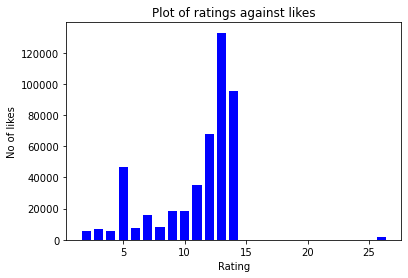

In [550]:
# Does the rating impact on the favorite_count
my_barplot(df_dogs,'rating_numerator','favorite_count','blue','Rating','No of likes', 'Plot of ratings against likes')

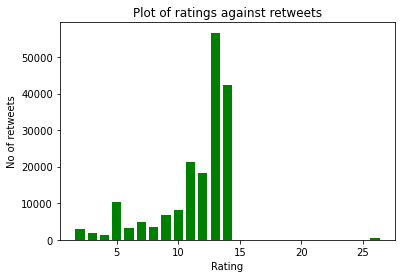

In [551]:
# Does the rating impact on the retweet_count
my_barplot(df_dogs,'rating_numerator','retweet_count','green','Rating','No of retweets', 'Plot of ratings against retweets')

In [552]:
# Defining a function to plot graphs
def my_barplot (dataset,x,y,col,xlabels,ylabels,titles):
    width = 0.75
    plt.barh(dataset[x],dataset[y],width,color = str(col))
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(titles)

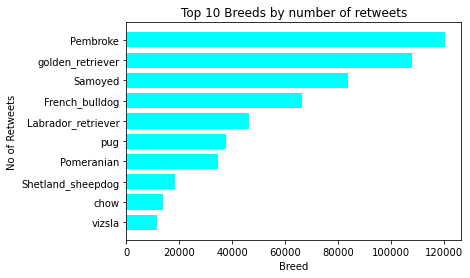

In [553]:
# In a sample of 233 dogs where the confidence rating is greater than or equal to 90
# top 10 dog breeds by the number of retweets
plot1 = df_breeds.groupby('p1').retweet_count.sum().reset_index()
sorted1 = plot1.sort_values('retweet_count', ascending= True)
my_barplot(sorted1.tail(10),'p1','retweet_count','cyan', 'Breed','No of Retweets', 'Top 10 Breeds by number of retweets')

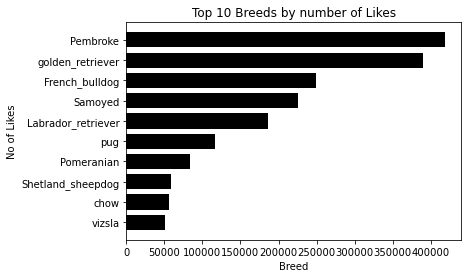

In [554]:
# In a sample of 233 dogs where the confidence rating is greater than or equal to 90
# top 10 dog breeds by the number of likes
plot2 = df_breeds.groupby('p1').favorite_count.sum().reset_index()
sorted2 = plot2.sort_values('favorite_count', ascending= True)
my_barplot(sorted2.tail(10),'p1','favorite_count','black', 'Breed','No of Likes', 'Top 10 Breeds by number of Likes')

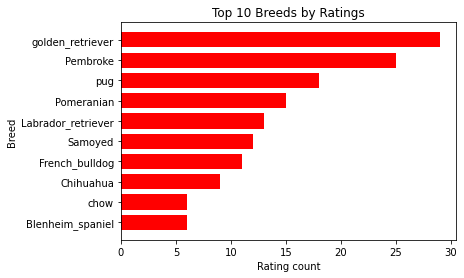

In [555]:
# In a sample of 233 dogs where the confidence rating is greater than or equal to 90
# top 10 dog breeds by ratings
plot3 = df_breeds.groupby('p1').rating_numerator.count().reset_index()
sorted3 = plot3.sort_values('rating_numerator', ascending= True)
my_barplot(sorted3.tail(10),'p1','rating_numerator','red', 'Rating count','Breed', 'Top 10 Breeds by Ratings')

In [556]:
#Defining a function to plot scatter diagrams with a trend line (line of best fit)
def scatter_trend (dataset,xaxis,yaxis,xlabels,ylabels, title):
    sns.regplot(x=dataset[xaxis], y=dataset[yaxis]);
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(title)

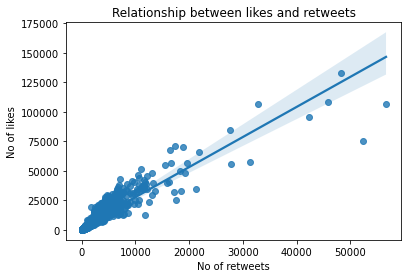

In [557]:
# What is the relationship between the favorite_count and retweet_count
scatter_trend(df_dogs, 'retweet_count','favorite_count', 'No of retweets', 'No of likes',
              'Relationship between likes and retweets' )

### Insights:

From the analysis and visualisations above, the following insights can be drawn from this dataset

1. The analysis and visualisations above suggest that the rating impacts the number of likes and retweets for each dog. However, futher analysis would be required for certainty

2. The top 10 breeds by the number of likes are the same top 10 breeds by the number of retweets, however, in a different order. This also suggests a strong positive correlation between the number of likes and retweets

3. **Pembroke** and **Golden** retriever are the top breeds across the variables (likes, retweets, and ratings). Further analysis would be required in order to crystalize these observations.

